# Example 3: Two-qubit equality circuit
Create a circuit that checks whether two qubits are equal in the computational basis. 

In [3]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import Aer, execute
from qiskit.tools.visualization import plot_histogram

In [20]:
# Create a 2-qubit input register and a 1-qubit output register
# Create a 1-bit classical register for the measurement`
# Create a circuit (qc) including those registers

qin = QuantumRegister(2)  # input
qout = QuantumRegister(1) # output
c = ClassicalRegister(1)
qc = QuantumCircuit(qin,qout,c)


In [21]:
# Define a python function that takes a circuit, an input register, and an output register
# The function adds gates to the circuit to implement the equals circuit
def equals_circuit(circuit, input_reg, out_reg):
    circuit.cx(input_reg[0], out_reg[0])
    circuit.cx(input_reg[1], out_reg[0])
    circuit.x(out_reg[0])
    return circuit


In [22]:
# Build a circuit that initializes the input bits to |0> or |1> (using an X gate)
# Calls the equal2 function and then measures the output
#qc.x(qin[0])
#qc.x(qin[1])
# if inputs are in superposition, will get an entangled state, 4 possiblilites for output
# cnots entangle the inputs with the output
qc = equals_circuit(qc, qin, qout)

qc.measure(qout,c)


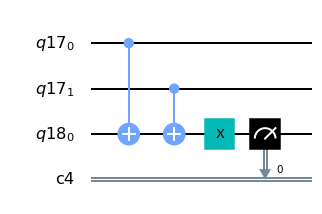

In [23]:
qc.draw(output='mpl')

{'1': 512}


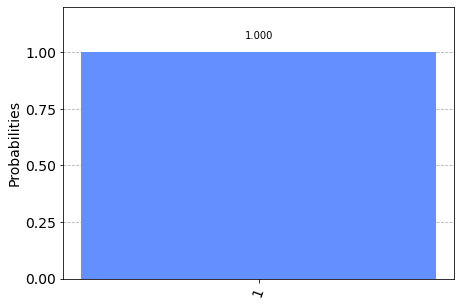

In [24]:
# Simulate and show results
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=512)  # shots default = 1024
result = job.result()
print(result.get_counts())
plot_histogram(result.get_counts())